## Overview ##
1. Neuron
1. Hidden Layer
1. Dataset
1. Data Preprocessing
1. Penghitungan Loss
1. Training Data
1. Referensi



### Neuron ###

Untuk membuat neuron, langkahnya cukup sederhana yaitu hanya dengan memanfaatkan library numpy. Sebagai contoh adalah  
![neuron](neuron.png)  
*Gambar 1. Model sederhana dari Neuron (Perceptron)*

di mana kotak merah adalah inputan, kotak biru adalah bias (B), dan kotak orange adalah fungsi aktivasi (sigmoid) $f(x)$. Dengan ini kita mendapatkan:  
$x_1 \to x_1 + b_1$  
$x_2 \to x_2 + b_2$  

Kemudian, semua nilai $x_1$ dan $x_2$ ditambahkan dengan bias, sehingga:

$output = (x_1 * b_1) + (x_2 * b_2) + B$ 

Dengan demikian, nilai $y$ bisa kita peroleh dengan:

$y = f(output)$

Adapun jika dibuat dalam bentuk kode adalah  

In [107]:
import numpy as np 

# membuat fungsi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    
    def __init__(self, bobot, bias):
        self.bobot = bobot
        self.bias = bias
        
    def feedforward(self, inputan):
        total = np.dot(self.bobot, inputan) + self.bias
        return sigmoid(total)
    
bobot = np.array([0, 1])
bias = 4

n = Neuron(bobot, bias)

x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


Di dalam sebuah neuron, terdapat beberapa istilah yaitu bobot, bias, dan fungsi aktivasi. Bobot dalam Neural Network (NN) adalah parameter utama yang berubah. Sedangkan bias adalah parameter tambahan. Nilai bias juga akan berubah seiring terjadinya training. Bias jugalah yang menyebabkan nilai dari fungsi aktivasi berpindah dari kiri / kanan.

### Hidden Layer ###

![MLP](mlp.png)
*Gambar 2. Model NN untuk MLP*

Hidden layer adalah layer tambahan yang berada diantara layer input dan layer output. Sebuah NN sederhana, biasanya terdiri atas input layer dan output layer. NN yang sederhana disebut sebagai **perceptron**. Penambahan hidden layer dalan NN, mengubah alur struktur NN, termasuk proses update bobot.  

Pada bagian sebelumnya, kita sudah memiliki sebuah model NN dengan dua buah input (node) yaitu $x_1 = 2$ dan $x_2 = 3$. Node pada hidden layer disimbolkan dengan huruf $h$. Kita buat sebuah model NN kita dengan satu layer yang ter dua buah node yaitu $h_1$ dan $h_2$ dan satu layer output dengan satu node $o_1$. 

In [108]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self):
        bobot = np.array([0,1]) # inisialisasi bobot awal
        bias = 0
        
        self.h1 = Neuron(bobot, bias)
        self.h2 = Neuron(bobot, bias)
        self.o1 = Neuron(bobot, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        
        return out_o1
    
network = MyNeuralNetwork()
x = np.array([2, 3])

print(network.feedforward(x))

0.7216325609518421


### Dataset ### 

Di praktikum ini, kita akan mengklasifikasikan jenis kelamin seseorang berdasarkan dua parameter yaitu tinggi badan dan berat badan. Kode berikut ini adalah contoh dari datasetnya:

In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('dataset/jenis_kelamin.csv')

X = data.iloc[:,1:3] # mengambil variabel independen saja
y = data.iloc[:,3] # mengambil variabel dependen / target / output class

y = y.astype('category')
y = y.cat.codes

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(data)

    Nama  Berat  Tinggi Jk
0   Budi     60     175  L
1   Sari     45     150  P
2  Indri     46     152  P
3   Joko     66     174  L
4  Emily     47     151  P
5  Frank     63     169  L
6  Ahmad     69     172  L
7   Lusi     46     151  P
8  Bagio     67     168  L
9   Siti     49     146  P


### Data Preprocessing ###  
Dataset kita preproses dengan dua tahap, yaitu normalisasi dan label encoding.

#### Normalisasi & Label Encoding ####
Di tahap ini, kita menggunakan teknik normalisasi Min Max Scaler pada atribut independen. Sedangkan pada output, kita gunakan label encoding [0, 1] untuk menggantikan jenis kelamin [L, P].

### Penghitungan Loss ###

Sebelum melatih NN, pertama kali kita harus menghitung seberapa bagus model NN yang telah dibuat. Di dalam statistik, ada salah satu teknik yang berfungsi untuk menghitung nilai error (loss), yaitu Mean-Squared Error (MSE). Formula dari MSE adalah:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_{true} - y_{pred})^2 
$$

Dengan melihat dataset kita, misalkan kita ambil data si Budi. Kita bisa menghitung nilai MSE-nya, yaitu:

$$
MSE = \frac{1}{1} \sum_{i=1}^{1}(y_t - y_p)^2   
$$
$$
MSE = (y_t - y_p)^2  
$$
$$
MSE = (1 - y_p)^2
$$


Berikut ini adalah contoh dari kode MSE

In [110]:
import numpy as np

def mse_loss(yt, yp):
    return ((yt - yp) ** 2).mean()

# 0 adalah contoh output dengan jenis kelamin laki-laki
# 1 adalah contoh output dengan jenis kelamin perempuan
# yt = y 
# yp = np.array([0, 0, 0, 0])

# print(mse_loss(yt, yp))

Di MSE, kita membandingkan nilai class aktual (yt) dengan nilai class hasil prediksi (yp). Dari perbandingan data contoh, sudah sangat jelas nilai dari $MSE = 0.5$ dikarenakan hanya ada dua class yp yang nilainya berbeda dengan yt. 

Nilai loss bisa diperoleh dengan cara menuliskan nilai loss sebagai sebuah fungsi terhadap bobot dan bias. Sehingga, loss $L$ diformulasikan dengan:

$$ L(b_1, b_2, b_3, b_4, b_5, b_6, B_1, B_2, B_3) $$

### Training Data ###

Sebenarnya, tujuan utama dari training adalah mencari nilai bobot-bobot dan bias yang paling optimal dengan cara mengubah nilai tersebut secara berkala sehingga nilai dari loss menjadi sangat kecil (mendekati nol). Langkah ini dinamakan sebagai **optimasi parameter** (OP). Ada beberapa teknik OP yang sering digunakan yaitu Stochastic Gradient Descent (SGD) dan ADAM. Dalam praktikum ini, kita akan memakai SGD untuk OP.  

Sebelum membahas SGD, mari kita ingat materi tentang **kaidah rantai** di mana:

$$ 
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} . \frac{\partial u}{\partial x}
$$

Perhatikan Gambar 2. Bagaimana dengan nilai $b_1$ maka nilai loss $L$ juga berubah? jawabannya adalah dengan menggunakan turunan parsial $ \frac{\partial L}{\partial b_1}$. 

Mari kita tulis ulang turunan parsial dari $\frac{\partial y_p}{\partial b_1} $ di mana:  

$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial y_p} * \frac{\partial y_p}{\partial b_1}
$$

Kita bisa menghitung $\frac{\partial L}{\partial y_p}$ karena kita sudah menghitung nilai loss di mana nilai $L = MSE$, seperti pada rumus di atas. Maka, yang kita dapatkan adalah:

$$
\frac{\partial L}{\partial y_p} = \frac{\partial (1 - y_p)^2}{\partial y_p} = -2(1 - y_p)
$$

Jika kita perhatikan pada Gambar 2, node $o_1$ adalah $y_p$ dan nilainya dipengaruhi oleh node $h_1$ dan $h_2$. Maka, kita mempunyai persamaan $y_p$ sebagai berikut:

$$
y_p = o_1 = f(b_5h_1 + b_6h_2 + B_3)
$$

di mana $f$ adalah fungsi sigmoid. Demikian pula dengan nilai $b_1$ yang hanya mempengaruhi $h_1$, maka, kita bisa menuliskan:  

$$
\frac{\partial y_p}{\partial b_1} = \frac{\partial y_p}{\partial h_1} * \frac{\partial h_1}{\partial b_1}
$$

$$
\frac{\partial y_p}{\partial h_1} = b_5 * f'(b_5h_1 + b_6h_2 + B_3)
$$

Kalkulasi yang sama juga kita terapkan pada $\frac{\partial h_1}{\partial b_1}$

$$
h_1 = f(b_1x_1 + b_2x_2 + B_1)
$$

$$
\frac{\partial h_1}{\partial b_1} = x_1 * f'(b_1x_1 + b_2 x_2 + B_1)
$$

Perlu diketahui bahwa $x_1$ itu adalah berat badan dan $x_2$ adalah tinggi badan. Langkah berikutnya adalah menurunkan fungsi sigmoid: 

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

$$
f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = f(x) * (1 - f(x))
$$

Alhamdulillah, kita telah berhasil menurunkan beberapa fungsi, sehingga kita bisa menghitung:  

$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial y_p} * \frac{\partial y_p}{\partial h_1} * \frac{\partial h_1}{\partial b_1}
$$

Proses update bobot-bobot dan bias ini dinamakan dengan **backpropagasi** atau **backpro**. 
Mari kita langsung terjun ke kode. Kita buat terlebih dulu kode dari turunan sigmoid.

In [111]:
def d_sigmoid(x):
    fx = sigmoid(x)
    
    return fx * (1 - fx)

Kita modif ulang model NN kita, yaitu MyNeuralNetwork.

In [112]:
class MyNeuralNetwork:
    def __init__(self):
        
        # generate nilai random untuk bobot-bobot
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        self.b4 = np.random.normal()
        self.b5 = np.random.normal()
        self.b6 = np.random.normal()
        
        self.B1 = np.random.normal()
        self.B2 = np.random.normal()
        self.B3 = np.random.normal()
    
    def feedforward(self, x):
        h1 = self.b1 * x[0] + self.b2 * x[1] + self.B1
        out_h1 = sigmoid(h1)
        
        h2 = self.b3 * x[0] + self.b4 + x[1] + self.B2
        out_h2 = sigmoid(h2)
        
        o1 = self.b5 * out_h1 + self.b6 * out_h2 + self.B3
        
        return sigmoid(o1)
    
    def train(self, data, all_yt, lr = 0.1, epochs = 1000):
        
        
        sbx = []
        sby = []
        
        for epoch in range(epochs):
            
            for x, yt in zip(data, all_yt):
            
                # kalkulasi feedforward
                jml_h1 = self.b1 * x[0] + self.b2 * x[1] + self.B1
                h1 = sigmoid(jml_h1)

                jml_h2 = self.b3 * x[0] + self.b4 * x[1] + self.B2
                h2 = sigmoid(jml_h1)

                jml_o1 = self.b5 * h1 + self.b6 * h2 + self.B3
                o1 = sigmoid(jml_o1)
                yp = o1
                
                # kalkulasi backpro
                # neuron o1
                d_L_d_yp = -2 * (yt - yp)

                d_yp_d_b5 = h1 * d_sigmoid(jml_o1)
                d_yp_d_b6 = h2 * d_sigmoid(jml_o1)
                d_yp_d_B3 = d_sigmoid(jml_o1)
                
                d_yp_d_h1 = self.b5 * d_sigmoid(jml_o1)
                d_yp_d_h2 = self.b6 * d_sigmoid(jml_o1)
            
                # neuron h1
                d_h1_d_b1 = x[0] * d_sigmoid(jml_h1)
                d_h1_d_b2 = x[1] * d_sigmoid(jml_h1)
                d_h1_d_B1 = d_sigmoid(jml_h1)
                
                # neuron h2
                d_h2_d_b3 = x[0] * d_sigmoid(jml_h2)
                d_h2_d_b4 = x[1] * d_sigmoid(jml_h2)
                d_h2_d_B2 = d_sigmoid(jml_h2)
                
                # mengupdate bobot b dan bias B
                self.b1 -= lr * d_L_d_yp * d_yp_d_h1 * d_h1_d_b1
                self.b2 -= lr * d_L_d_yp * d_yp_d_h1 * d_h1_d_b2
                self.B1 -= lr * d_L_d_yp * d_yp_d_h1 * d_h1_d_B1
                
                self.b3 -= lr * d_L_d_yp * d_yp_d_h2 * d_h2_d_b3
                self.b4 -= lr * d_L_d_yp * d_yp_d_h2 * d_h2_d_b4
                self.B2 -= lr * d_L_d_yp * d_yp_d_h2 * d_h2_d_B2
                
                self.b5 -= lr * d_L_d_yp * d_yp_d_b5 
                self.b6 -= lr * d_L_d_yp * d_yp_d_b6 
                self.B3 -= lr * d_L_d_yp * d_yp_d_B3
                
                if epoch % 10 == 0:
                    yp = np.apply_along_axis(self.feedforward, 1, data)
                    loss = mse_loss(all_yt, yp)
                    sbx.append(epoch)
                    sby.append(loss)
#                     print("Epoch %d loss: %.3f" % (epoch, loss))
                
        return sbx, sby


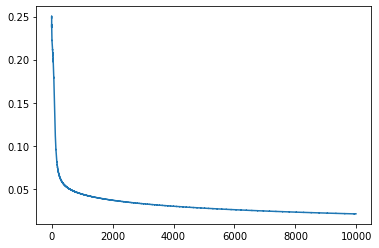

In [113]:
import matplotlib.pyplot as plt

all_yt = y_train
data = X_train

network = MyNeuralNetwork()
sbx, sby = network.train(data, all_yt, 0.1, 10000)

plt.plot(sbx, sby)
plt.show()

Mari kita coba memprediksi dengan sampel berikut:

In [114]:


oddy = np.array([0.75, 0.793]).reshape(-1,1) # 63 kg, 169 cm

silvi = np.array([0.041, 0.172]).reshape(-1,1)  # 46 kg, 151 cm
print("Oddy: %.3f" % network.feedforward(oddy)) 
print("Silvi: %.3f" % network.feedforward(silvi)) 

Oddy: 0.022
Silvi: 0.808


### Referensi ###
Modul ini diadaptasi dari artikel milik Victor Zhou yang bisa diakses di [sini](https://victorzhou.com/blog/intro-to-neural-networks/)